In [38]:
import pandas as pd
import os
import json
train_annotation_data = json.load(open(os.path.join('..', 'datasets', 'visual_ground', 'instances.json')))
train_text_data = json.load(open(os.path.join('..', 'datasets', 'visual_ground', 'dataset.json')))
train_text = pd.DataFrame(train_text_data)



In [39]:

train_annotation = pd.DataFrame(train_annotation_data["annotations"])
# train_annotation.loc[0]['segmentation'][0]
train_annotation.head(10)

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[21.11, 239.09, 16.31, 274.6, 198.65, 349.45,...",48667.84090,0,131074,"[16.31, 141.21, 421.29, 208.24]",65,318235
1,"[[474.17, 215.44, 342.4, 201.98, 317.39, 195.2...",10501.20610,0,131074,"[299.12, 136.58, 241.7, 88.85]",65,319598
2,"[[326.4, 318.87, 320.05, 305.25, 323.68, 274.8...",3110.01535,0,131074,"[320.05, 248.05, 79.89, 83.07]",31,1174042
3,"[[283.47, 194.46, 271.43, 192.79, 274.44, 189....",39.81120,0,131074,"[271.43, 189.61, 14.22, 4.85]",75,1630619
4,"[[320.17, 195.66, 319.05, 221.23, 425.78, 234....",6405.16950,0,131074,"[319.05, 195.66, 184.54, 98.94]",65,1957252
5,"[[598.98, 190.19, 572.3, 162.65, 555.95, 154.0...",67919.38955,0,524291,"[279.7, 148.88, 348.54, 272.82]",18,10608
6,"[[37.56, 337.14, 2.75, 336.22, 0.0, 240.03, 15...",16442.95975,0,524291,"[0.0, 231.78, 285.83, 109.94]",18,16521
7,"[[65.1, 1.91, 67.97, 57.44, 89.99, 37.33, 99.5...",14876.25665,0,524291,"[0.0, 0.96, 133.07, 204.86]",1,191602
8,"[[108.64, 81.1, 85.77, 90.63, 83.87, 68.71, 93...",7739.57085,0,524291,"[53.37, 37.26, 56.23, 194.42]",34,605247
9,"[[435.35, 146.7, 442.93, 162.55, 445.0, 163.93...",11730.44705,0,524297,"[376.07, 114.71, 93.06, 240.85]",1,428468


(160, 120)
72.086 166.80533333333335 123.27000000000001 224.00000000000003


/tmp/ipykernel_27842/3682732978.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((224,224), Image.ANTIALIAS)


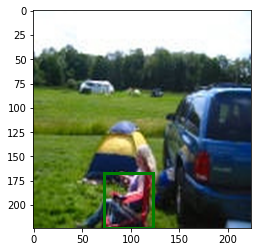

canvas and metal folding camp chair
The camping chair that the woman is sitting on next to the tent.
(160, 120)
133.028 72.22133333333332 224.0 223.99999999999997


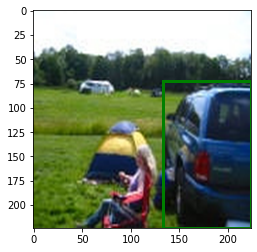

A blue SUV next to a woman sitting in a chair next to a tent.
blue SUV


KeyError: 49822

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon, Rectangle
from PIL import Image

idx = 0
for idx in range(0, 1000000):
    ann_id = train_text.loc[idx, 'ann_id']
    sentences = train_text.loc[idx, 'sentences']
    image_id = train_text.loc[idx, 'image_id']
    if image_id != 352680:
        continue
    x = train_annotation[train_annotation['id'] == ann_id]
    bbox = x['bbox'].values[0]
    if idx % 1000 == 0:
        print(idx)

    image_path = os.path.join('..','datasets','Images','train2014',f'COCO_train2014_{image_id:012}.jpg')
    img = Image.open(image_path)
    print(img.size)

    b0 = bbox[0] / img.size[0] * 224
    b1 = bbox[1] / img.size[1] * 224
    b2 = bbox[2] / img.size[0] * 224
    b3 = bbox[3] / img.size[1] * 224
    if bbox[0] > img.size[1] or bbox[1] > img.size[0]:
        pass
    img = img.resize((224,224), Image.ANTIALIAS)
    print(b0, b1, b0+b2, b1+b3)
    # print(img.shape)
    fig,ax = plt.subplots(1)

    ax.imshow(img)
    box_plot = Rectangle((b0, b1), b2, b3, fill=False, edgecolor='green', linewidth=3)
    ax.add_patch(box_plot)
    plt.show()
    print(sentences[0]["raw"])
    print(sentences[1]["raw"])

In [ ]:
import torch
PATH = 'VGG19+Transformer-hyper-epoch-00.ckpt'
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()


idx = 0
for idx in range(0, 10):
    ann_id = train_text.loc[idx, 'ann_id']
    sentences = train_text.loc[idx, 'sentences']
    image_id = train_text.loc[idx, 'image_id']
    x = train_annotation[train_annotation['id'] == ann_id]
    bbox = x['bbox'].values[0]

    image_path = os.path.join('..','datasets','Images','train2014',f'COCO_train2014_{image_id:012}.jpg')
    img = mpimg.imread(image_path)
    fig,ax = plt.subplots(1)

    ax.imshow(img)
    box_plot = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='green', linewidth=3)
    ax.add_patch(box_plot)
    plt.show()
    print(sentences[0]["raw"])
    print(sentences[1]["raw"])